In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
train_X[0].shape

(28, 28)

In [0]:
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

In [0]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255
test_X = test_X/255

In [0]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [7]:
model= Sequential()


W0808 04:25:38.486385 140053209429888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [10]:
model.add(Conv2D(64, kernel_size =3, input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

W0808 04:32:11.840613 140053209429888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 04:32:11.845303 140053209429888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 04:32:11.877229 140053209429888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [11]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics =['accuracy'])

W0808 04:32:57.348980 140053209429888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0808 04:32:57.362507 140053209429888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
model.fit(train_X, train_Y_one_hot, batch_size = 64, epochs =10)

W0808 04:35:51.332344 140053209429888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0808 04:35:51.403036 140053209429888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.4704 - acc: 0.8301
Epoch 2/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.3220 - acc: 0.8830
Epoch 3/10
28800/60000 [=============>................] - ETA: 42s - loss: 0.2737 - acc: 0.8997

KeyboardInterrupt: ignored

In [14]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs = 5)
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)

print('Test Loss: ', test_loss)
print('Test accuracy: ', test_acc)


Epoch 1/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2654 - acc: 0.9034
Epoch 2/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2403 - acc: 0.9119
Epoch 3/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2216 - acc: 0.9194
Epoch 4/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2051 - acc: 0.9250
Epoch 5/5
10000/10000 [==============================] - 4s 412us/step
Test Loss:  0.2787106426477432
Test accuracy:  0.9023


NameError: ignored

9


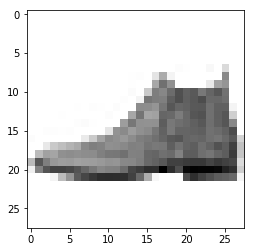

In [20]:

predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

plt.imshow(test_X[0].reshape(28,28), cmap = plt.cm.binary)
plt.show()